<a href="https://colab.research.google.com/github/dalia0516/AI-class/blob/main/Customer_E_commerce_dataset_Regression_and_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,

import kagglehub
carrie1_ecommerce_data_path = kagglehub.dataset_download('carrie1/ecommerce-data')
kanak97_filetsv_path = kagglehub.dataset_download('kanak97/filetsv')
retailrocket_ecommerce_dataset_path = kagglehub.dataset_download('retailrocket/ecommerce-dataset')
kartikeybartwal_ecommerce_product_recommendation_collaborative_path = kagglehub.dataset_download('kartikeybartwal/ecommerce-product-recommendation-collaborative')

print('Data source import complete.')


100%|██████████| 7.20M/7.20M [00:00<00:00, 98.9MB/s]

Extracting files...


100%|██████████| 852k/852k [00:00<00:00, 33.9MB/s]

Extracting files...


100%|██████████| 291M/291M [00:03<00:00, 95.1MB/s]

Extracting files...


100%|██████████| 23.6k/23.6k [00:00<00:00, 15.6MB/s]

Extracting files...
Data source import complete.


This data includes information on users' browsing history, product views, clicks, purchases, and other interactions on the e-commerce platform

The dataset consists of three files: a file with behaviour data (events.csv), a file with item properties (item_properties.сsv) and a file, which describes category tree (category_tree.сsv),The behaviour data, i.e. events like clicks, add to carts, transactions, represent interactions ,A visitor can make three types of events, namely “view”, “addtocart” or “transaction”

## Implementation Outline
1.  Data Preprocessing:
   - Clean and normalize data.
   - Scale numerical features like Age for consistency.

2.  Recommendation System Models:
     Collaborative Filtering:
   - Recommend products based on item similarities.

     Logistic Regression:
   - Identify and reduce false positives in recommendations.

3.  Evaluation Metrics :
   - Confusion Matrix: Visualize recommendation accuracy.
   - Classification Report: Evaluate precision, recall, and F1-score.
   - Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for collaborative filtering.

4.  Visualization:
   - Correlation matrix for feature relationships.
   - Scatter plots to explore user demographics and spending patterns.
   - Heatmaps for user-product interactions.

## Part 1: Linear Regression
- Implement data preprocessing and feature engineering.
- Build collaborative filtering and Logistic Regression models.
- Evaluate model performance using classification and error metrics.
- Enhance recommendations by analyzing user-product interactions.

In [ ]:
#Step 1: import the required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [ ]:
#Step 2: Generate the dataset/ import dataset
data = pd.read_csv(kartikeybartwal_ecommerce_product_recommendation_collaborative_path + '/user_personalized_features.csv')
# To remove unnecessary columns
data.drop(['Unnamed: 0', ], axis=1, inplace=True)
data.head(10)#sample of 10

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
5,#6,38,Male,Suburban,25926,Travel,22,8,25,2669,Books,520,28,False
6,#7,56,Male,Urban,124555,Fashion,11,7,152,1113,Home & Kitchen,330,31,True
7,#8,36,Male,Urban,29496,Technology,26,7,108,2151,Apparel,558,19,True
8,#9,40,Male,Rural,76447,Travel,25,6,130,4085,Books,325,3,True
9,#10,28,Male,Urban,121604,Food,13,8,61,4999,Electronics,114,36,False


In [ ]:
# Step 3: Data Cleaning
# Ensure numeric columns are converted to numeric and handle invalid entries
numeric_columns = [
    'Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency',
    'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
data.fillna(0, inplace=True)  # Fill NaN values with 0

categorical_columns = ['Gender', 'Location', 'Interests', 'Newsletter_Subscription']
for col in categorical_columns:
    if col in data.columns:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

<Axes: title={'center': ' Age vs total spending'}, xlabel='Age', ylabel='Total_Spending'>

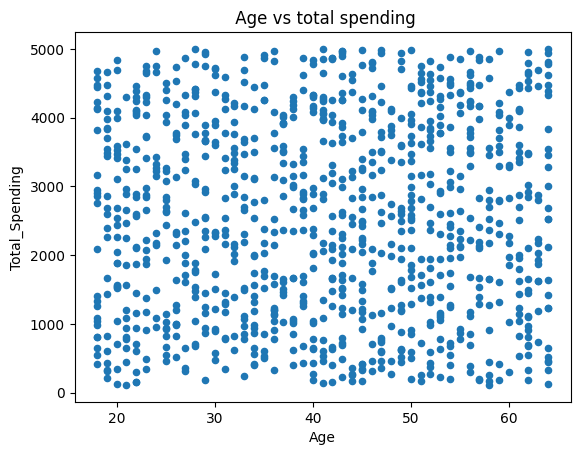

In [ ]:
#Step 3: Visualize the data
#total amount of data
data.plot (x = 'Age', y='Total_Spending', kind='scatter', title=' Age vs total spending')

<Axes: title={'center': 'Age vs Total Spending'}, xlabel='Age', ylabel='Total_Spending'>

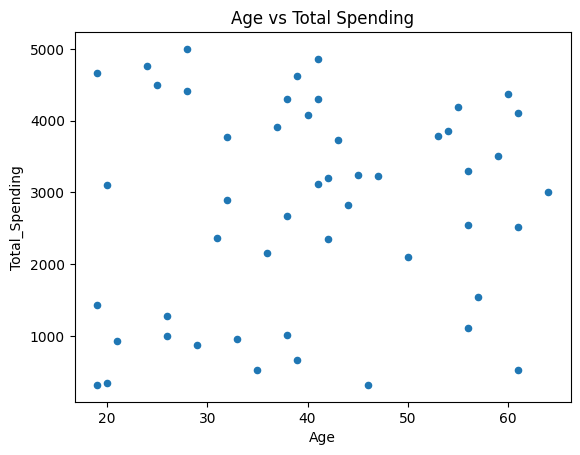

In [ ]:
#Step 3 refined : Visualize the data
# Limit the data to the first 50 rows using head()
data.head(50).plot(x='Age', y='Total_Spending', kind='scatter', title='Age vs Total Spending')

In [ ]:
import numpy as np
# Step 3.1: Add new features
np.random.seed(42)  # For reproducibility
data['purchased'] = np.random.choice([0, 1], size=len(data))  # Binary flag: Purchased or not
data['visitor'] = np.random.choice(['New', 'Returning'], size=len(data))  # Categorical: Visitor type
data['bought_count'] = np.random.randint(0, 20, size=len(data))  # Random count of items purchased

# Encode 'visitor' as categorical
data['visitor'] = LabelEncoder().fit_transform(data['visitor'])

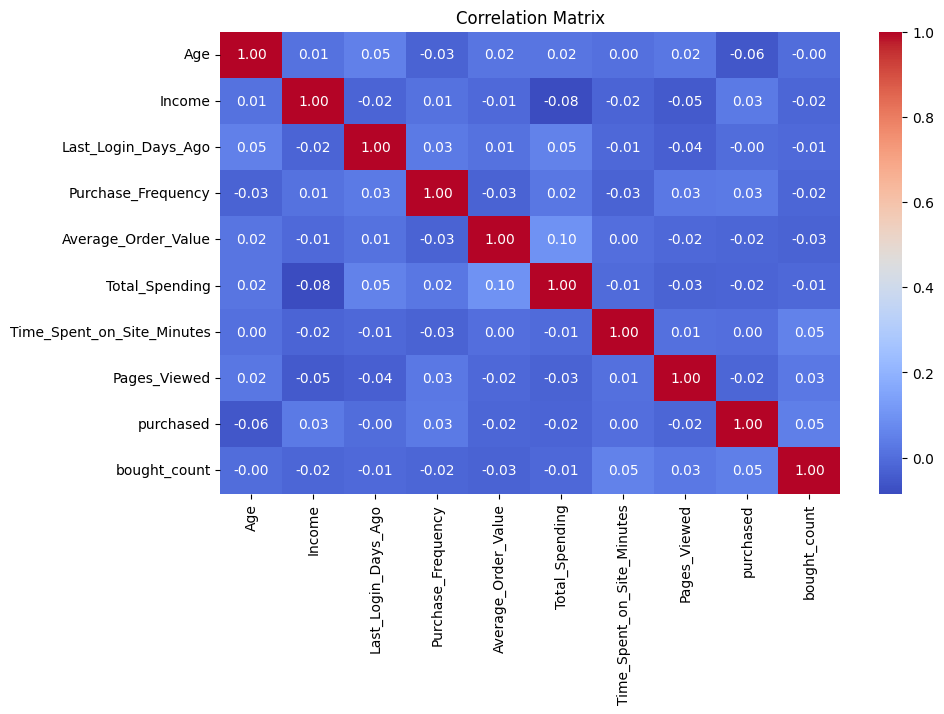

In [ ]:
# Step 3.2: Correlation Matrix
correlation_matrix = data[numeric_columns + ['purchased', 'bought_count']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 4: Define features and target for Logistic Regression
features = [
    'Age', 'Income', 'Total_Spending', 'Pages_Viewed', 'Gender', 'Location',
    'Interests', 'Newsletter_Subscription', 'Time_Spent_on_Site_Minutes',
    'Purchase_Frequency', 'Average_Order_Value', 'visitor', 'bought_count'
]
X = data[features]
y = data['purchased']  # Target is now 'purchased'

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

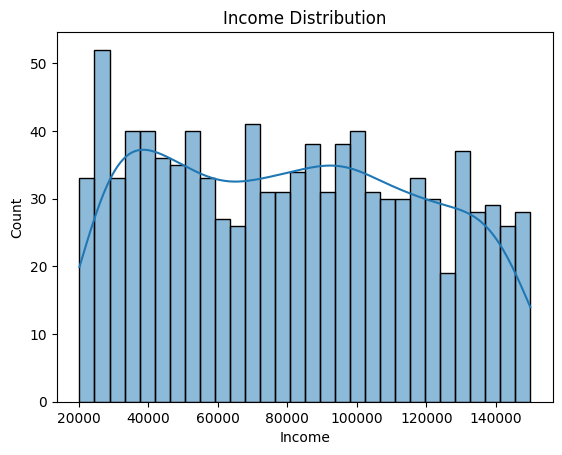

In [ ]:
#Visualize the distribution plots of a single variable using histplot
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

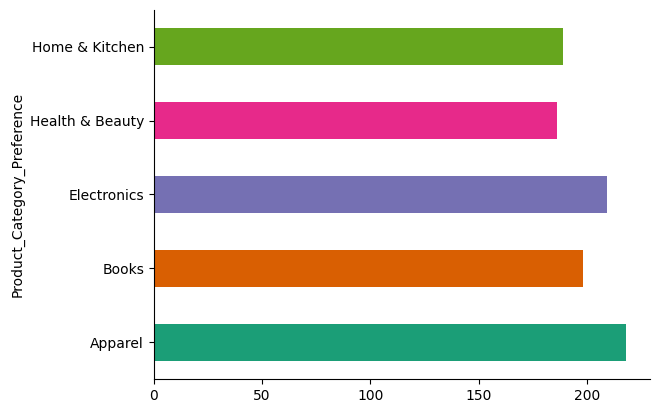

In [ ]:
#  Product_Category_Preference

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Product_Category_Preference').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Step 5: Train-test split
from sklearn.model_selection import train_test_split # Import the necessary function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


NameError: name 'X_scaled' is not defined

In [ ]:
# Step 6: Train Logistic Regression Model
logreg = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
# Step 7: Evaluate Logistic Regression Model
y_pred_class = logreg.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       144
           1       0.52      0.47      0.49       156

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



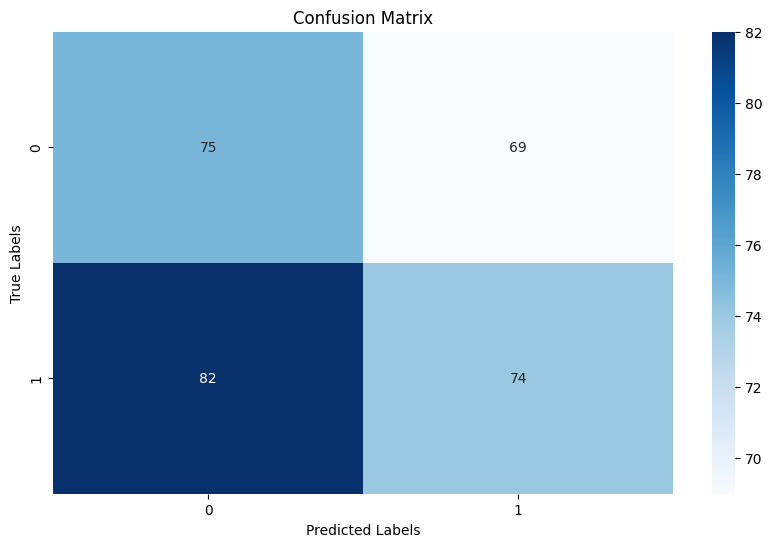

Model Accuracy: 0.4967


In [ ]:
# Step 7: Evaluate Logistic Regression Model
y_pred_class = logreg.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred_class, zero_division=0))

# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate Model Accuracy
accuracy = logreg.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

<ipython-input-16-7ac95a91c8d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bought_count_ranking.index, y=bought_count_ranking.values, palette='viridis')


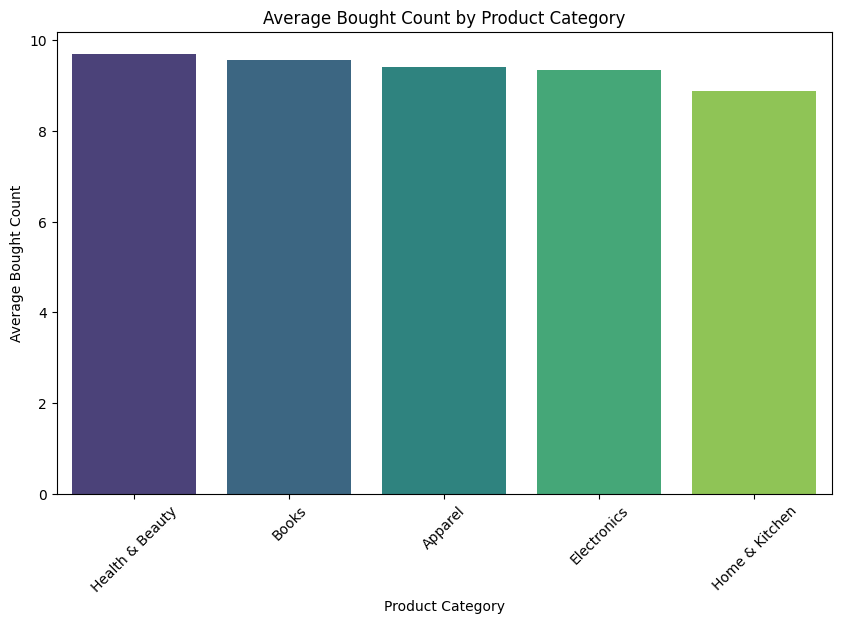

In [ ]:
# Step 8: Visualize Ranking of Bought Count
bought_count_ranking = data.groupby('Product_Category_Preference')['bought_count'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=bought_count_ranking.index, y=bought_count_ranking.values, palette='viridis')
plt.title('Average Bought Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Bought Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-17-3fa56f0c910d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='coolwarm')


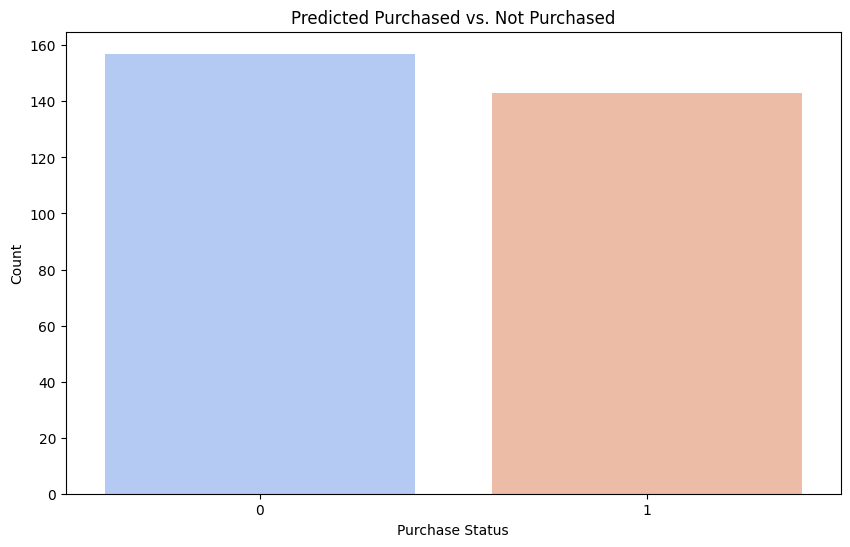

In [ ]:
# Step 9: Aggregate Product Preferences from Predictions
predicted_counts = pd.Series(y_pred_class).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='coolwarm')
plt.title('Predicted Purchased vs. Not Purchased')
plt.xlabel('Purchase Status')
plt.ylabel('Count')
plt.show()

This section:
- Explore a bit about customer behaviour based on the data and do basic customer segmentation
- Recommendations for future analysis

In [ ]:
# prompt: load the Retail Rocket CSV files into DataFrames

import pandas as pd

# Assuming the dataset files are in the retailrocket_ecommerce_dataset_path directory
events_df = pd.read_csv(retailrocket_ecommerce_dataset_path + '/events.csv')
category_tree_df = pd.read_csv(retailrocket_ecommerce_dataset_path + '/category_tree.csv')
item_properties_part1_df = pd.read_csv(retailrocket_ecommerce_dataset_path + '/item_properties_part1.csv')
item_properties_part2_df = pd.read_csv(retailrocket_ecommerce_dataset_path + '/item_properties_part2.csv')

# Now you have the data in pandas DataFrames: events_df, category_tree_df, item_properties_part1_df, and item_properties_part2_df
print("Events DataFrame:")
print(events_df.head())

print("\nCategory Tree DataFrame:")
print(category_tree_df.head())

print("\nItem Properties Part 1 DataFrame:")
print(item_properties_part1_df.head())

print("\nItem Properties Part 2 DataFrame:")
print(item_properties_part2_df.head())

Events DataFrame:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

Category Tree DataFrame:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0

Item Properties Part 1 DataFrame:
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513

Item Propertie

In [ ]:
#Let's get all the customers who bought something
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
customer_purchased.size

#Assumption: Since we have no information whether there were any repeat
#users who bought something from the site, I'll just have to assume for now that
#the 11,719 visitors are unique and made at least a single purchase
#Let's get all unique visitor ids as well
all_customers = events_df.visitorid.unique()
all_customers.size

customer_browsed = [x for x in all_customers if x not in customer_purchased]
len(customer_browsed)

NameError: name 'events_df' is not defined

In [ ]:
#Put all the visitor id in an array and sort it ascendingly
all_visitors = events_df.visitorid.sort_values().unique()
all_visitors.size

1407580

In [ ]:
buying_visitors = events_df[events_df.event == 'transaction'].visitorid.sort_values().unique()
buying_visitors.size

11719

In [ ]:
viewing_visitors_list = list(set(all_visitors) - set(buying_visitors))


In [ ]:
def create_dataframe(visitor_list):

    array_for_df = []
    for index in visitor_list:

        #Create that visitor's dataframe once
        v_df = events_df[events_df.visitorid == index]

        temp = []
        #Add the visitor id
        temp.append(index)

        #Add the total number of unique products viewed
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.event == 'view'].event.count())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)

        #Then put either a zero or one if they made a purchase
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)

    return pd.DataFrame(array_for_df, columns=['visitorid', 'num_items_viewed', 'view_count', 'bought_count', 'purchased'])

In [ ]:
buying_visitors_df = create_dataframe(buying_visitors)
buying_visitors_df.shape

(11719, 5)

In [ ]:
#Let's shuffle the viewing visitors list for randomness
import random
random.shuffle(viewing_visitors_list)
viewing_visitors_df = create_dataframe(viewing_visitors_list[0:27820])
viewing_visitors_df.shape

(27820, 5)

In [ ]:
# prompt: combine the two data frames

# Combine the two dataframes
main_df = pd.concat([buying_visitors_df, viewing_visitors_df], ignore_index=True)


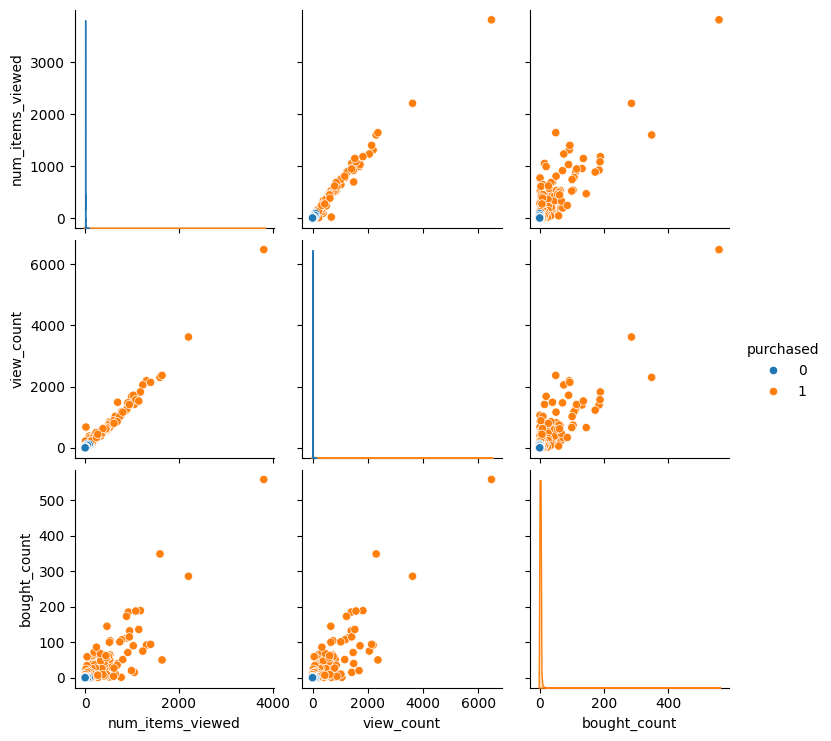

In [ ]:
#Plot the data
sns.pairplot(main_df, x_vars = ['num_items_viewed', 'view_count', 'bought_count'],
             y_vars = ['num_items_viewed', 'view_count', 'bought_count'],  hue = 'purchased')


The plot above clearly indicates that the higher the view count, the higher the chances of that visitor buying something

In [ ]:
X = main_df.drop(['purchased', 'visitorid', 'bought_count'], axis = 'columns')
y = main_df.purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_class = logreg.predict(X_test)
print('accuracy = {:7.4f}'.format(metrics.accuracy_score(y_test, y_pred_class)))

accuracy =  0.7914


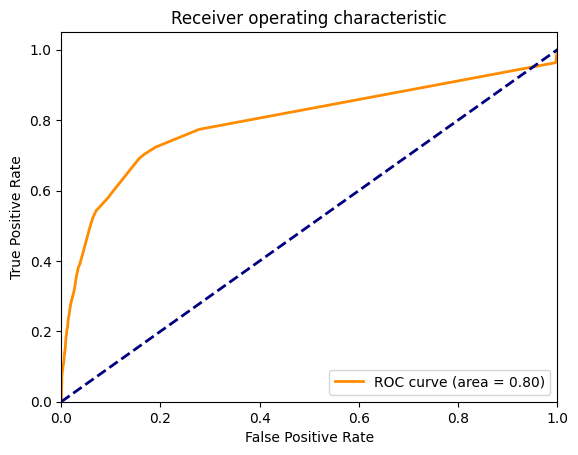

In [ ]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

The graph above shows the accuracy of our binary classifier (Logistic Regression). Just means that the closer the orange curve leans to the top left hand part of the graph, the better the accuracy.